# Notebook v0 : juste phy_att_1
_Zoé_

In [1]:
import numpy as np
import pandas as pd
import plotly as plt

## Load data

In [47]:
def load_data(file, encoding='utf-16', sep='\t'):
    data = pd.read_csv(f'dataset/Physical dataset/{file}.csv', encoding=encoding, sep=sep)
    return data

In [3]:
df_phy1 = load_data('phy_att_1')
# df_phy2 = load_data('phy_att_2')
# df_phy3 = load_data('phy_att_3')
# df_phy4 = load_data('phy_att_4')
# df_phy_norm = load_data('phy_norm')

In [4]:
print(df_phy1.head())

                  Time  Tank_1  Tank_2  Tank_3  Tank_4  Tank_5  Tank_6  \
0  09/04/2021 18:23:28       0       0       0       0       0       0   
1  09/04/2021 18:23:29       0       0       0       0       0       0   
2  09/04/2021 18:23:30       0       0       0       0       0       0   
3  09/04/2021 18:23:31       0       0       0       0       0       0   
4  09/04/2021 18:23:32       0       0       0       0       0       0   

   Tank_7  Tank_8  Pump_1  ...  Valv_15  Valv_16  Valv_17  Valv_18  Valv_19  \
0       0       0   False  ...    False    False    False    False    False   
1       0       0   False  ...    False    False    False    False    False   
2       0       0   False  ...    False    False    False    False    False   
3       0       0   False  ...    False    False    False    False    False   
4       0       0    True  ...    False    False    False    False    False   

   Valv_20  Valv_21  Valv_22  Label_n   Label  
0    False    False    False    

In [21]:
# dimensions
print(df_phy1.shape)

(2420, 43)


In [6]:
print(df_phy1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           2420 non-null   object
 1   Tank_1         2420 non-null   int64 
 2   Tank_2         2420 non-null   int64 
 3   Tank_3         2420 non-null   int64 
 4   Tank_4         2420 non-null   int64 
 5   Tank_5         2420 non-null   int64 
 6   Tank_6         2420 non-null   int64 
 7   Tank_7         2420 non-null   int64 
 8   Tank_8         2420 non-null   int64 
 9   Pump_1         2420 non-null   bool  
 10  Pump_2         2420 non-null   bool  
 11  Pump_3         2420 non-null   bool  
 12  Pump_4         2420 non-null   bool  
 13  Pump_5         2420 non-null   bool  
 14  Pump_6         2420 non-null   bool  
 15  Flow_sensor_1  2420 non-null   int64 
 16  Flow_sensor_2  2420 non-null   int64 
 17  Flow_sensor_3  2420 non-null   int64 
 18  Flow_sensor_4  2420 non-null

On voit qu'on a une colonne de temps, à convertir en timestamp peut etre ? étudier les différents intervalles de temps ?  
8 de tank, : entier  
6 de pump, : booléen  
4 folw sensor,  : entier  
22 valv, : booléen  
2 colonnes de label, une int et une catégorielle

On va regarder ce qu'il y a dans label

In [12]:
# allons voir ce qu'il y a dans label
print(df_phy1['Label'].value_counts())

Label
normal            1610
MITM               533
physical fault     277
Name: count, dtype: int64


In [15]:
# afficher à la fois Label et Label_n avec le nombre de valeurs uniques
print(df_phy1[['Label', 'Label_n']].nunique())

Label      3
Label_n    2
dtype: int64


In [16]:
# afficher à la fois Label et Label_n avec le nombre de fois qu'ils apparaissent en commun
print(df_phy1[['Label', 'Label_n']].value_counts())

Label           Label_n
normal          0          1610
MITM            1           533
physical fault  1           277
Name: count, dtype: int64


In [ ]:
# on peut déduire de que Label_n 0 -> normal -> benign
# 1 -> MITM ou physical fault -> attack ? chercher à quoi ça correspond 

In [17]:
# afficher le nombre de normal et d'attaque
print(df_phy1['Label_n'].value_counts())

Label_n
0    1610
1     810
Name: count, dtype: int64


In [18]:
# on veut regarder ce qu'il se passe au niveau du temps
# pour l'instant la colonne est catégorielle mais on aimerait la basculer en timestamp
# on va donc transformer la colonne en datetime
df_phy1['Time'] = pd.to_datetime(df_phy1['Time'])
print(df_phy1['Time'].dtype)

datetime64[ns]


In [19]:
# afficher les différentes valeurs de Time
print(df_phy1['Time'].value_counts())

Time
2021-09-04 19:03:47    1
2021-09-04 18:23:28    1
2021-09-04 18:23:29    1
2021-09-04 18:23:30    1
2021-09-04 19:03:31    1
                      ..
2021-09-04 18:23:36    1
2021-09-04 18:23:35    1
2021-09-04 18:23:34    1
2021-09-04 18:23:33    1
2021-09-04 18:23:32    1
Name: count, Length: 2420, dtype: int64


In [20]:
# regarder la différence entre chaque valeur de Time
print(df_phy1['Time'].diff().value_counts())

Time
0 days 00:00:01    2419
Name: count, dtype: int64


In [ ]:
# série temporelle avec 1 seconde d'intervalles -> CNN 1D ?

In [24]:
# regarder la distribution des valeurs numériques pour Flow_sensor_1, Flow_sensor_2, Flow_sensor_3, Flow_sensor_4
print(df_phy1[['Flow_sensor_1', 'Flow_sensor_2', 'Flow_sensor_3', 'Flow_sensor_4']].describe())

       Flow_sensor_1  Flow_sensor_2  Flow_sensor_3  Flow_sensor_4
count    2420.000000    2420.000000         2420.0    2420.000000
mean     1634.090909    1595.041322            0.0    1283.821488
std      1963.983001    1958.977859            0.0    1738.336519
min         0.000000       0.000000            0.0       0.000000
25%         0.000000       0.000000            0.0       0.000000
50%         0.000000       0.000000            0.0       0.000000
75%      4000.000000    4000.000000            0.0    2769.000000
max      4000.000000    4000.000000            0.0    4789.000000


In [29]:
print(df_phy1[['Flow_sensor_1']].value_counts())
print(df_phy1[['Flow_sensor_2']].value_counts())
print(df_phy1[['Flow_sensor_3']].value_counts())
print(df_phy1[['Flow_sensor_4']].value_counts())

Flow_sensor_1
0                1368
4000              987
100                65
Name: count, dtype: int64
Flow_sensor_2
0                1455
4000              965
Name: count, dtype: int64
Flow_sensor_3
0                2420
Name: count, dtype: int64
Flow_sensor_4
0                1372
4635                6
4668                6
4527                5
4478                5
                 ... 
1412                1
3025                1
3023                1
1421                1
3096                1
Name: count, Length: 686, dtype: int64


In [ ]:
# 0, 100, 4k pour Flow_sensor_1
# 0, 4k pour Flow_sensor_2
# 0 pour Flow_sensor_3 -> inutile : si identique dans autres physical datasets on peut le supprimer
# beaucoup de valeurs pour Flow_sensor_4

In [32]:
# combien y a t il de valeurs différentes pour Flow_sensor_1, Flow_sensor_2, Flow_sensor_3, Flow_sensor_4
print(df_phy1[['Flow_sensor_1', 'Flow_sensor_2', 'Flow_sensor_3', 'Flow_sensor_4']].nunique())

Flow_sensor_1      3
Flow_sensor_2      2
Flow_sensor_3      1
Flow_sensor_4    686
dtype: int64


[[<Axes: title={'center': 'Flow_sensor_1'}>
  <Axes: title={'center': 'Flow_sensor_2'}>]
 [<Axes: title={'center': 'Flow_sensor_3'}>
  <Axes: title={'center': 'Flow_sensor_4'}>]]


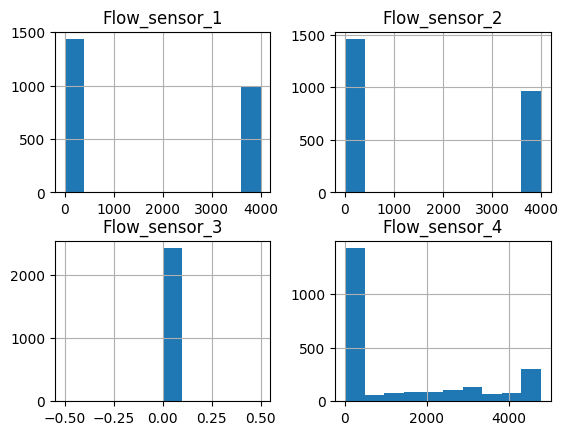

In [25]:
print(df_phy1[['Flow_sensor_1', 'Flow_sensor_2', 'Flow_sensor_3', 'Flow_sensor_4']].hist())

In [34]:
# idem pour les différent tank
print(df_phy1[['Tank_1', 'Tank_2', 'Tank_3', 'Tank_4', 'Tank_5', 'Tank_6', 'Tank_7', 'Tank_8']].describe())

            Tank_1       Tank_2       Tank_3       Tank_4       Tank_5  \
count  2420.000000  2420.000000  2420.000000  2420.000000  2420.000000   
mean    686.320661   714.946281   922.677686   362.064463   361.733058   
std     654.955181   656.051613   942.572849   366.970644   278.799110   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     5.000000    73.250000    27.000000    30.500000   
50%     598.000000   639.500000   747.500000   231.000000   370.000000   
75%    1244.000000  1293.250000  1226.250000   692.250000   605.250000   
max    1980.000000  1952.000000  3427.000000  1134.000000   835.000000   

            Tank_6       Tank_7       Tank_8  
count  2420.000000  2420.000000  2420.000000  
mean    198.284298   207.890083   163.835124  
std     190.497343   216.415569   179.054521  
min       0.000000     0.000000     0.000000  
25%       3.000000     0.000000     0.000000  
50%     165.500000   144.000000    86.000000  
75% 

In [36]:
print(df_phy1[['Tank_1', 'Tank_2', 'Tank_3', 'Tank_4', 'Tank_5', 'Tank_6', 'Tank_7', 'Tank_8']].nunique())

Tank_1    1049
Tank_2    1120
Tank_3    1234
Tank_4     807
Tank_5     721
Tank_6     482
Tank_7      99
Tank_8     424
dtype: int64


[[<Axes: title={'center': 'Tank_1'}> <Axes: title={'center': 'Tank_2'}>
  <Axes: title={'center': 'Tank_3'}>]
 [<Axes: title={'center': 'Tank_4'}> <Axes: title={'center': 'Tank_5'}>
  <Axes: title={'center': 'Tank_6'}>]
 [<Axes: title={'center': 'Tank_7'}> <Axes: title={'center': 'Tank_8'}>
  <Axes: >]]


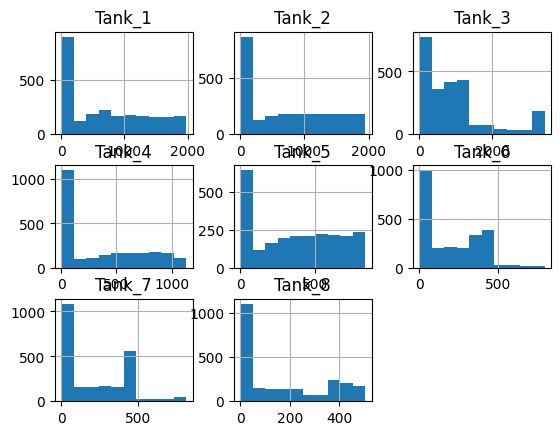

In [37]:
print(df_phy1[['Tank_1', 'Tank_2', 'Tank_3', 'Tank_4', 'Tank_5', 'Tank_6', 'Tank_7', 'Tank_8']].hist())

In [ ]:
# vérifions qu'on a les memes données pour les autres datasets
# 1. les memes colonnes
# 2. combien de ligne 
# 3. comparer les labels
# 4. comparer la répartition des valeurs numériques

In [50]:
df_phy2 = load_data('phy_att_2')
df_phy3 = load_data('phy_att_3')
df_phy4 = load_data('phy_att_4', encoding='utf-8', sep=',')

In [51]:
print(df_phy1.shape)
print(df_phy2.shape)
print(df_phy3.shape)
print(df_phy4.shape)

(2420, 43)
(2104, 43)
(1254, 43)
(1717, 43)


In [64]:
# comment vérifier que les colonnes sont les mêmes ?   

# convertir columns en list et comparer les deux listes avec diff
print(list(df_phy1.columns.difference(df_phy2.columns)))
print(list(df_phy2.columns.difference(df_phy1.columns)))
print(list(df_phy1.columns.difference(df_phy3.columns)))
print(list(df_phy3.columns.difference(df_phy1.columns)))
print(list(df_phy1.columns.difference(df_phy4.columns)))
print(list(df_phy4.columns.difference(df_phy1.columns)))

['Label_n']
['Lable_n']
[]
[]
[]
[]


In [65]:
# on voit qu'il faut renommer la colonne Lable_n en Label_n pour phy_2  pour avoir exactement les memes colonnes dans chaque dataset
df_phy2.rename(columns={'Lable_n': 'Label_n'}, inplace=True)

In [66]:
print(df_phy1['Label_n'].value_counts())
print(df_phy2['Label_n'].value_counts())
print(df_phy3['Label_n'].value_counts())
print(df_phy4['Label_n'].value_counts())
# bien que des 0 -> benign, 1 -> attack

Label_n
0    1610
1     810
Name: count, dtype: int64
Label_n
0    1798
1     306
Name: count, dtype: int64
Label_n
0    911
1    343
Name: count, dtype: int64
Label_n
0    1159
1     558
Name: count, dtype: int64


In [100]:
# vérifier pour chaque dataset que 0 dans Label_n correspond à normal et 1 à != normal
print(df_phy1[df_phy1['Label_n'] == 0]['Label'].value_counts().to_dict())
print(df_phy2[df_phy2['Label_n'] == 0]['Label'].value_counts().to_dict())
print(df_phy3[df_phy3['Label_n'] == 0]['Label'].value_counts().to_dict())
print(df_phy4[df_phy4['Label_n'] == 0]['Label'].value_counts().to_dict())
print('-'*50)

print(df_phy1[df_phy1['Label_n'] == 1]['Label'].value_counts().to_dict())
print(df_phy2[df_phy2['Label_n'] == 1]['Label'].value_counts().to_dict())
print(df_phy3[df_phy3['Label_n'] == 1]['Label'].value_counts().to_dict())
print(df_phy4[df_phy4['Label_n'] == 1]['Label'].value_counts().to_dict())

{'normal': 1610}
{'normal': 1798}
{'normal': 911}
{'normal': 1159}
--------------------------------------------------
{'MITM': 533, 'physical fault': 277}
{'physical fault': 123, 'MITM': 96, 'DoS': 80, 'scan': 7}
{'physical fault': 152, 'MITM': 114, 'DoS': 77}
{'MITM': 265, 'DoS': 153, 'physical fault': 133, 'scan': 7}


In [76]:
# on voit que dans df_phy2 il y a des problèmes -> renommer "nomal" en normal 249 fois
df_phy2['Label'] = df_phy2['Label'].str.replace('nomal', 'normal')

In [80]:
# vérifier qu'il y a zéro Label_n = 0 et Label != normal 
print(df_phy1[(df_phy1['Label_n'] == 0) & (df_phy1['Label'] != 'normal')].shape)
print(df_phy2[(df_phy2['Label_n'] == 0) & (df_phy2['Label'] != 'normal')].shape)
print(df_phy3[(df_phy3['Label_n'] == 0) & (df_phy3['Label'] != 'normal')].shape)
print(df_phy4[(df_phy4['Label_n'] == 0) & (df_phy4['Label'] != 'normal')].shape)


(0, 43)
(0, 43)
(0, 43)
(0, 43)


In [81]:
# vérifier qu'il y a zéro Label_n = 1 et Label = normal 
print(df_phy1[(df_phy1['Label_n'] == 1) & (df_phy1['Label'] == 'normal')].shape)
print(df_phy2[(df_phy2['Label_n'] == 1) & (df_phy2['Label'] == 'normal')].shape)
print(df_phy3[(df_phy3['Label_n'] == 1) & (df_phy3['Label'] == 'normal')].shape)
print(df_phy4[(df_phy4['Label_n'] == 1) & (df_phy4['Label'] == 'normal')].shape)

(0, 43)
(0, 43)
(0, 43)
(0, 43)


In [82]:
# comment vérifier que les labels sont les mêmes ?
# lister tous les labels différents
print(df_phy1['Label'].unique())
print(df_phy2['Label'].unique())
print(df_phy3['Label'].unique())
print(df_phy4['Label'].unique())

['normal' 'MITM' 'physical fault']
['normal' 'scan' 'DoS' 'physical fault' 'MITM']
['normal' 'physical fault' 'DoS' 'MITM']
['normal' 'scan' 'DoS' 'physical fault' 'MITM']


In [84]:
# transform time 
df_phy2['Time'] = pd.to_datetime(df_phy2['Time'])
df_phy3['Time'] = pd.to_datetime(df_phy3['Time'])
df_phy4['Time'] = pd.to_datetime(df_phy4['Time'])

/tmp/ipykernel_85706/2652067358.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_phy2['Time'] = pd.to_datetime(df_phy2['Time'])
/tmp/ipykernel_85706/2652067358.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_phy4['Time'] = pd.to_datetime(df_phy4['Time'])


In [85]:
# vérifier que toujours qu'une seconde entre chaque valeur
print(df_phy1['Time'].diff().value_counts())
print(df_phy2['Time'].diff().value_counts())
print(df_phy3['Time'].diff().value_counts())
print(df_phy4['Time'].diff().value_counts())

Time
0 days 00:00:01    2419
Name: count, dtype: int64
Time
0 days 00:00:01    2102
0 days 00:00:02       1
Name: count, dtype: int64
Time
0 days 00:00:01    1253
Name: count, dtype: int64
Time
0 days 00:00:01    1716
Name: count, dtype: int64


In [ ]:
# investiguer : il y a 2 secondes UNE SEULE FOIS dans phy2 -> peut etre que la conversion en timestamp s'est mal passée
# que faire si vraiment 2 secondes -> est ce qu'on comble le trou en dupliquant la valeur précédente ?

In [83]:
# EDA de normal dataset
df_phy_norm = load_data('phy_norm')

In [86]:
print(df_phy_norm.head())   

                  Time  Tank_1  Tank_2  Tank_3  Tank_4  Tank_5  Tank_6  \
0  09/04/2021 11:30:50       0       0       0       0       0       0   
1  09/04/2021 11:30:51       0       0       0       0       0       0   
2  09/04/2021 11:30:52       0       0       0       0       0       0   
3  09/04/2021 11:30:53       0       0       0       0       0       0   
4  09/04/2021 11:30:54       0       0       0       0       0       0   

   Tank_7  Tank_8  Pump_1  ...  Valv_15  Valv_16  Valv_17  Valv_18  Valv_19  \
0       0       0   False  ...    False    False    False    False    False   
1       0       0   False  ...    False    False    False    False    False   
2       0       0   False  ...    False    False    False    False    False   
3       0       0   False  ...    False    False    False    False    False   
4       0       0   False  ...    False    False    False    False    False   

   Valv_20  Valv_21  Valv_22  Label_n   Label  
0    False    False    False    

In [87]:
print(df_phy_norm.shape)

(3428, 43)


In [90]:
# regardons les colonnes
attack_col = set(df_phy1.columns)
normal_col = set(df_phy_norm.columns)
print(attack_col.difference(normal_col))
print(normal_col.difference(attack_col))

set()
set()


In [95]:
# regardons les labels
print(df_phy_norm['Label'].value_counts().to_dict())
print(df_phy_norm['Label_n'].value_counts().to_dict())

{'normal': 3428}
{0: 3428}


In [106]:
# regardons les null pour chaque dataset 
# si = 0 -> on peut les supprimer

dict_1 = df_phy1.isnull().sum().to_dict()
dict_2 = df_phy2.isnull().sum().to_dict()
dict_3 = df_phy3.isnull().sum().to_dict()
dict_4 = df_phy4.isnull().sum().to_dict()
dict_norm = df_phy_norm.isnull().sum().to_dict()

print({k: v for k, v in dict_1.items() if v > 0})
# aucune valeur nulle

{}


In [111]:
# lorsque booléen, est ce que seulement un true à la fois ? pump de 1 à 6 et valv de 1 à 22
# regardons juste pour phy1
print("nb ligne dans phy1 : ", df_phy1.shape[0])
val_1 = df_phy1['Pump_1'].sum()
val_2 = df_phy1['Pump_2'].sum()
val_3 = df_phy1['Pump_3'].sum()
val_4 = df_phy1['Pump_4'].sum()
val_5 = df_phy1['Pump_5'].sum()
val_6 = df_phy1['Pump_6'].sum()
print(val_1, val_2, val_3, val_4, val_5, val_6)
print(val_1 + val_2 + val_3 + val_4 + val_5 + val_6)
# non -> plusieurs valeurs à true en même temps possible
# mais on voit que pour phy1 pump_3 est toujours à false -> on peut le supprimer si idem dans autre dataset

nb ligne dans phy1 :  2420
726 590 0 461 991 966
3734


In [113]:
print(df_phy1['Pump_3'].value_counts().to_dict())
print(df_phy2['Pump_3'].value_counts().to_dict())
print(df_phy3['Pump_3'].value_counts().to_dict())
print(df_phy4['Pump_3'].value_counts().to_dict())
print(df_phy_norm['Pump_3'].value_counts().to_dict())
# que des false -> colonne à supprimer

{False: 2420}
{False: 2104}
{False: 1254}
{False: 1717}
{False: 3428}


In [116]:
# regardons pour valv pour phy1
print("nb ligne dans phy1 : ", df_phy1.shape[0])
sum_valv = 0
for i in range(1, 23):
    sum_valv += df_phy1[f'Valv_{i}'].sum()
    print(f'Valv_{i}',df_phy1[f'Valv_{i}'].value_counts().to_dict())
print(sum_valv)
# idem : ne sommes pas à 1 true par valv 
# mais on voit plein de colonnes à valeur constante à false, regardons dans les autres datasets

nb ligne dans phy1 :  2420
Valv_1 {False: 2420}
Valv_2 {False: 2420}
Valv_3 {False: 2420}
Valv_4 {False: 2420}
Valv_5 {False: 2420}
Valv_6 {False: 2420}
Valv_7 {False: 2420}
Valv_8 {False: 2420}
Valv_9 {False: 2420}
Valv_10 {True: 1615, False: 805}
Valv_11 {True: 1615, False: 805}
Valv_12 {True: 1614, False: 806}
Valv_13 {True: 1269, False: 1151}
Valv_14 {True: 1269, False: 1151}
Valv_15 {True: 1269, False: 1151}
Valv_16 {False: 2420}
Valv_17 {False: 1486, True: 934}
Valv_18 {False: 1861, True: 559}
Valv_19 {False: 2420}
Valv_20 {True: 1500, False: 920}
Valv_21 {False: 2420}
Valv_22 {False: 1372, True: 1048}
12692


In [122]:
# combien de valeurs dans chaque dataset pour chaque colonne de valv 
for i in range(1, 23):
    _true = 0
    _false = 0

    dict_1 = df_phy1[f'Valv_{i}'].value_counts().to_dict()
    dict_2 = df_phy2[f'Valv_{i}'].value_counts().to_dict()
    dict_3 = df_phy3[f'Valv_{i}'].value_counts().to_dict()
    dict_4 = df_phy4[f'Valv_{i}'].value_counts().to_dict()
    dict_norm = df_phy_norm[f'Valv_{i}'].value_counts().to_dict()

    if len(dict_1) == 1:
        if dict_1.get(True):
            _true += 1
        if dict_1.get(False):
            _false += 1
    if len(dict_2) == 1:
        if dict_2.get(True):
            _true += 1
        if dict_2.get(False):
            _false += 1
    if len(dict_3) == 1:
        if dict_3.get(True):
            _true += 1
        if dict_3.get(False):
            _false += 1
    if len(dict_4) == 1:
        if dict_4.get(True):
            _true += 1
        if dict_4.get(False):
            _false += 1
    if len(dict_norm) == 1:
        if dict_norm.get(True):
            _true += 1
        if dict_norm.get(False):
            _false += 1

    if _true == 5 or _false == 5:
        print(f'Valv_{i} : ', _true, _false)


Valv_1 :  0 5
Valv_2 :  0 5
Valv_3 :  0 5
Valv_4 :  0 5
Valv_5 :  0 5
Valv_6 :  0 5
Valv_7 :  0 5
Valv_8 :  0 5
Valv_9 :  0 5
Valv_16 :  0 5
Valv_19 :  0 5
Valv_21 :  0 5


In [ ]:
# on voit qu'on a 12 colonnes à supprimer car seulement des False -> TODO

In [ ]:
# ??? est ce qu'on doit ajouter les données norm dans notre grand dataframe ou pas ?
# time -> transformer en 1 à n secondes ?
# 1 gros dataframe ou on concatène les données norm et les données attaque, on ajoute une colonne pour dire de quel dataset ça vient

In [ ]:
# Observation des données 

# Clean data
    # noms des colonnes
    # cohérence
    # valeurs manquantes

# Analyse exploratoire : EDA -> première vizs 

# Visualisations 
# Analyses statistiques (PCA, correlations)
# Analyse par Machine learning